## 1. Problem

   * We have a regression prblem: to Predict Black-Friday purchase.

## 2. Data
  * Dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. 
This is a regression problem. 
The dataset has 550,069 rows and 12 columns.



Source: https://datahack.analyticsvidhya.com/contest/black-friday/

## 3. Evaluation
  * We use three evaluation matrices: Mean Squared error (MSE), Mean Absolute Error(MAE), and R^2 / coeeficient of determination.

## 4. Modelling
  *Since we have a regression problem we are going to apply a regression model in this case Random Forest Regressor (you can check the cheat sheet for deatil model selection)

## 5. Model improvement 
  * we apply hyperparameter tuning to improve our model, we use RandomSearchCV accordingly.

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [244]:
train = pd.read_csv(r"C:\Aye backup\Python\Udemy\zero-to-mastery-ml-master\My project_Black_Friday\train.csv")
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [246]:
train["Product_Category_1"].isna().sum(), train["Product_Category_2"].isna().sum(), train["Product_Category_3"].isna().sum()

(0, 173638, 383247)

In [245]:
train["Product_Category_3"].isna().sum()/550068*100, train["Product_Category_2"].isna().sum()/550068*100, train["Product_Category_1"].isna().sum()/550068*100

(69.67265865311198, 31.56664266963357, 0.0)

In [4]:
### it looks like product category 3 has more null values which is close to 70 percent of the data, so we delete the feature.
### keep product category 2 and 1.

In [5]:
train.drop(["Product_Category_3"],  axis=1, inplace=True)

In [6]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,7871


In [7]:
train["Product_Category_2"].fillna(train["Product_Category_2"].median(), inplace = True)

In [8]:
train["Product_Category_2"].isna().sum(), train["Product_Category_1"].isna().sum()

(0, 0)

In [9]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
Label_Encoder = LabelEncoder()

train["Gender"] = Label_Encoder.fit_transform(train["Gender"])
train["City_Category"] = Label_Encoder.fit_transform(train["City_Category"])
train["Age_Category"] = Label_Encoder.fit_transform(train["Age"]) #then we drop the Age variable. lets delete after visualization

In [11]:
# # we can also use fn to create a category of the above variables 

# def Age_Category(Age):
#     if Age == '0-17':
#         return 1
#     elif Age == '18-25':
#         return 2
#     elif Age == '26-35':
#         return 3
#     elif Age == '36-45':
#         return 4
#     elif Age == '46-50':
#         return 5
#     elif Age == '51-55':
#         return 6
#     else :
#         return 7
# train["Age_Category"] = train["Age"].apply(Age_Category)        # now we can delete Age .. but let us do that after visualization

In [45]:
train.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Age_Category
0,0,10,0,2,0,3,9.0,8370,0
1,0,10,0,2,0,1,6.0,15200,0
2,0,10,0,2,0,12,9.0,1422,0
3,0,10,0,2,0,12,14.0,1057,0
4,1,16,2,4,0,8,9.0,7969,6


In [13]:
train.Gender.unique(), train.Age.unique(),   train.City_Category.unique() 

    # make sure no missing values    
    # also make sure 0 is for gender and 1 is form menA=0, B = 1, C = 2 , 

(array([0, 1], dtype=int64),
 array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
       dtype=object),
 array([0, 2, 1], dtype=int64))

In [14]:
train.head(5)     

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Age_Category
0,1000001,P00069042,0,0-17,10,0,2,0,3,9.0,8370,0
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,15200,0
2,1000001,P00087842,0,0-17,10,0,2,0,12,9.0,1422,0
3,1000001,P00085442,0,0-17,10,0,2,0,12,14.0,1057,0
4,1000002,P00285442,1,55+,16,2,4+,0,8,9.0,7969,6


C:\Users\Ayu .LAPTOP-R57J3HIU.000\Anaconda3librarybin\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


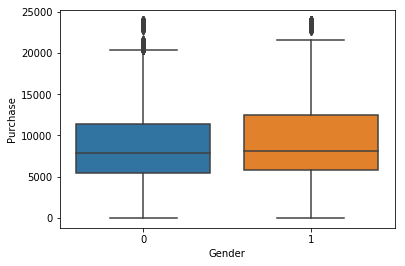

In [15]:
sns.boxplot(x =train["Gender"], y = train["Purchase"])

C:\Users\Ayu .LAPTOP-R57J3HIU.000\Anaconda3librarybin\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


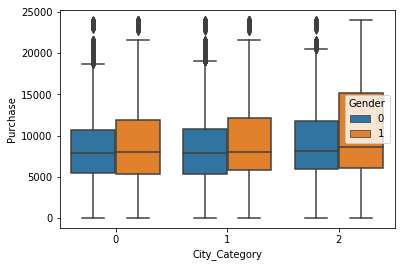

In [16]:
sns.boxplot(x =train["City_Category"], y = train["Purchase"], hue=train["Gender"])

C:\Users\Ayu .LAPTOP-R57J3HIU.000\Anaconda3librarybin\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


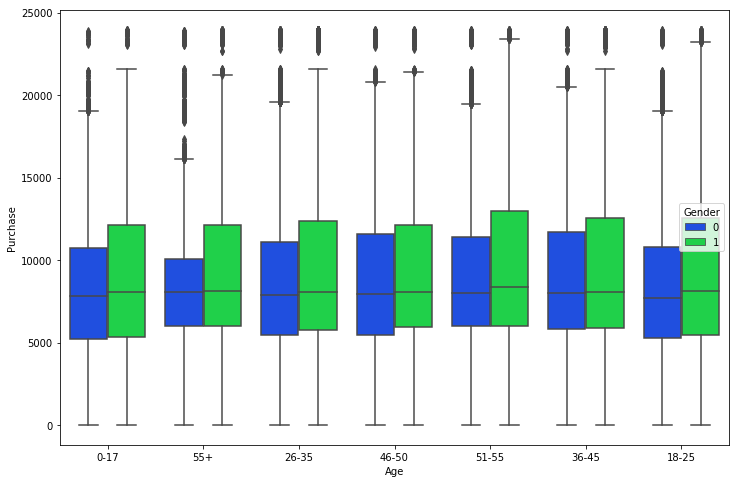

In [17]:
fig, ax = plt.subplots(figsize = (12,8))
    
ax = sns.boxplot(x =train["Age"], y = train["Purchase"], hue= train["Gender"], palette='bright')

In [18]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Age_Category
0,1000001,P00069042,0,0-17,10,0,2,0,3,9.0,8370,0
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,15200,0
2,1000001,P00087842,0,0-17,10,0,2,0,12,9.0,1422,0
3,1000001,P00085442,0,0-17,10,0,2,0,12,14.0,1057,0
4,1000002,P00285442,1,55+,16,2,4+,0,8,9.0,7969,6
5,1000003,P00193542,1,26-35,15,0,3,0,1,2.0,15227,2
6,1000004,P00184942,1,46-50,7,1,2,1,1,8.0,19215,4
7,1000004,P00346142,1,46-50,7,1,2,1,1,15.0,15854,4
8,1000004,P0097242,1,46-50,7,1,2,1,1,16.0,15686,4
9,1000005,P00274942,1,26-35,20,0,1,1,8,9.0,7871,2


C:\Users\Ayu .LAPTOP-R57J3HIU.000\Anaconda3librarybin\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\Ayu .LAPTOP-R57J3HIU.000\Anaconda3librarybin\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


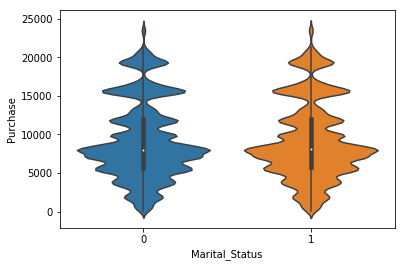

In [19]:
sns.violinplot("Marital_Status", y="Purchase", data = train)

C:\Users\Ayu .LAPTOP-R57J3HIU.000\Anaconda3librarybin\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


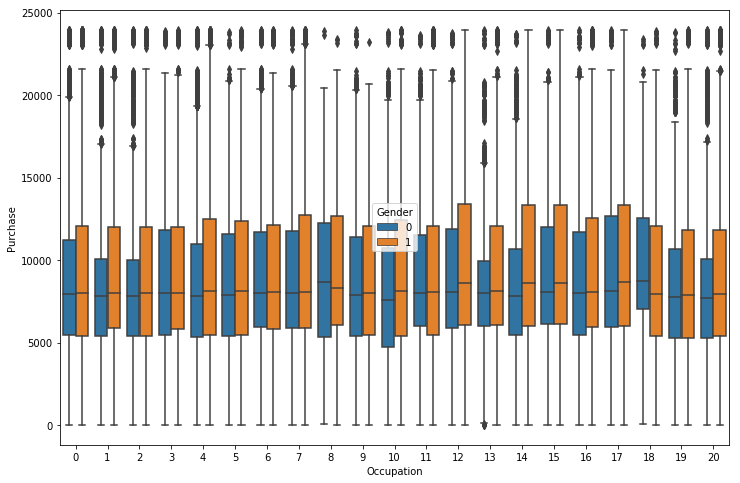

In [26]:
fig = plt.subplots(figsize = (12, 8))
sns.boxplot(x="Occupation", y = "Purchase", hue="Gender", data = train)

In [152]:
train["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

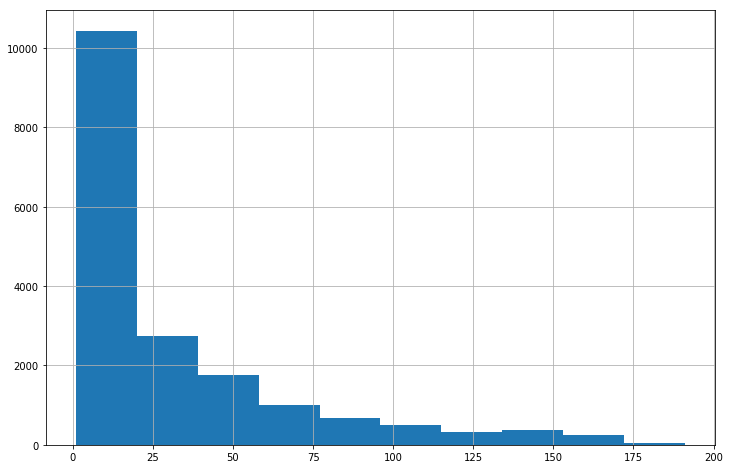

In [27]:
fig = plt.subplots(figsize= (12,8))
train["Purchase"].value_counts().hist()

In [153]:
# no significnt change in purchasing behavior between married and non-married.

In [28]:
train.Purchase[1:100].sort_values(ascending = False)

74    19672
56    19653
19    19614
86    19525
73    19473
      ...  
70     1780
96     1539
2      1422
3      1057
80      697
Name: Purchase, Length: 99, dtype: int64

In [29]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Age_Category
0,1000001,P00069042,0,0-17,10,0,2,0,3,9.0,8370,0
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,15200,0


In [30]:
forget = train[["User_ID", "Product_ID", "Age"]]

train.drop(forget, axis =1, inplace = True )

In [31]:
train.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Age_Category
0,0,10,0,2,0,3,9.0,8370,0
1,0,10,0,2,0,1,6.0,15200,0
2,0,10,0,2,0,12,9.0,1422,0
3,0,10,0,2,0,12,14.0,1057,0
4,1,16,2,4+,0,8,9.0,7969,6


In [32]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [33]:
def stay(Stay_In_Current_City_Years):
        if Stay_In_Current_City_Years == '4+':
            return 4
        else:
            return Stay_In_Current_City_Years
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].apply(stay).astype(int)    

In [34]:
train.dtypes

Gender                          int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
Age_Category                    int32
dtype: object

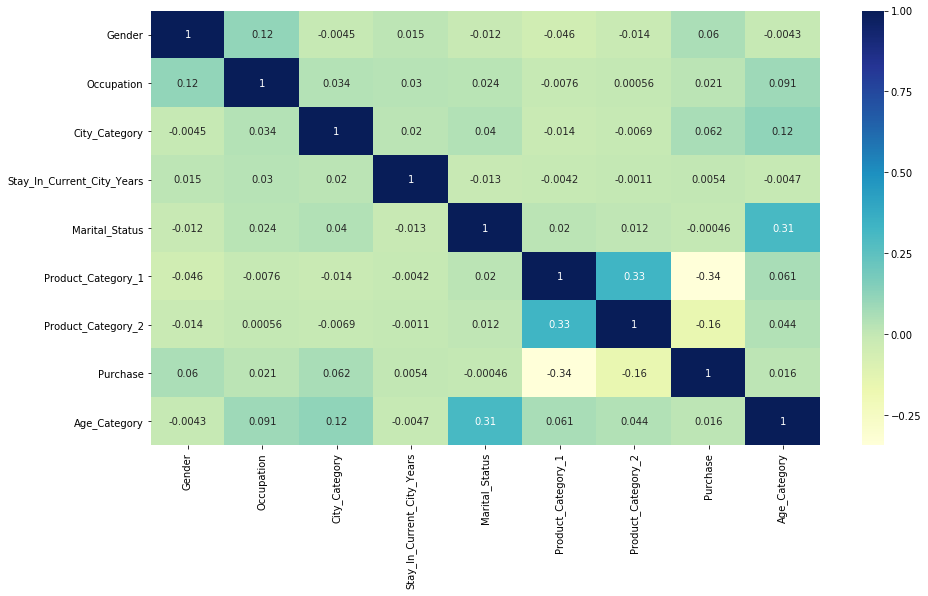

In [35]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.heatmap(train.corr(), annot=True, cmap="YlGnBu" )

## Modelling

In [36]:
X = train.drop("Purchase", axis=1)
y = train["Purchase"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [58]:
train.dtypes

Gender                          int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
Age_Category                    int32
dtype: object

In [185]:
#model
%time
#cutting down on the max number of samples each estimator can see improves training time

# rf_regressor = RandomForestRegressor(n_estimators=100)


rf_regressor = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)

rf_regressor.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\Ayu .LAPTOP-R57J3HIU.000\Anaconda3librarybin\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [186]:
rf_regressor.score(X_test, y_test)

0.6331709033377078

## Prediction and metrics 

In [187]:
y_pred = rf_regressor.predict(X_test)

In [188]:
r2 = r2_score(y_test, y_pred)
r2

0.6331709033377078

In [189]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

2220.4628072637283

In [190]:
MSE = mean_squared_error(y_test, y_pred)
MSE

9249889.622905642

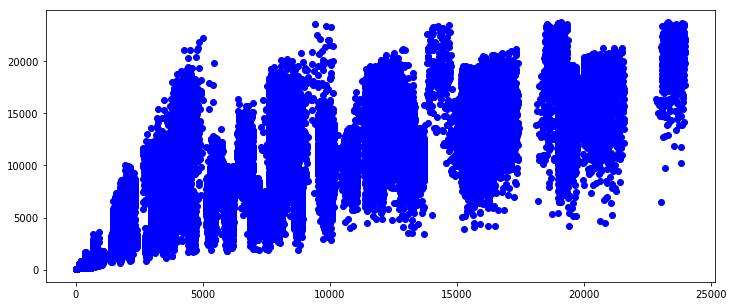

In [191]:
fig, ax = plt.subplots(figsize=(12,5))
ax = plt.scatter(y_test, y_pred, c="blue")

## Hyperparameter tuning  

Optimizing hyperparameters for machine learning models is a key step in making accurate predictions. Hyperparameters define characteristics of the model that can impact model accuracy and computational efficiency. They are typically set prior to fitting the model to the data. In contrast, parameters are values estimated during the training process that allow the model to fit the data. Hyperparameters are often optimized through trial and error; multiple models are fit with a variety of hyperparameter values, and their performance is compared.

Cross-validation is often used to determine the optimal values for hyperparameters; we want to identify a model structure that performs the best on records it has not been trained on. A variety of hyperparameter values should be considered. For example, below are some candidate hyperparameters.
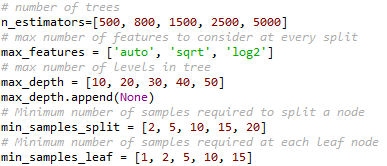

source: https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead

In [192]:
# 1. RandomSearchCV 

grid =  {"n_estimators": [10,50,100],
       "max_depth": [None,10,20,30,40,50,],
       "max_features": ["auto", "sqrt"],
       "min_samples_leaf": [2,10,15],
       "min_samples_split": [2,5,20]}


In [193]:
randomsearchCV = RandomizedSearchCV(rf_regressor, param_distributions = grid, n_iter = 5, cv=5,  verbose = True, n_jobs=2 )
     
         #"Verbose is a general programming term for produce lots of logging output. You can think of it as asking the program to "tell me everything about what you are doing all the time". 
          #Just set it to true and see what happens."
            
            
        # if you specify n_jobs to -1, it will use all cores in the CPU (100% CPU). 
          #If it is set to 1 or 2, it will use one or two cores only 

In [194]:
%time

randomsearchCV.fit(X_train, y_train)


Wall time: 0 ns
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed: 12.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=2,
          param_distributions={'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [2, 10, 15], 'min_samples_split': [2, 5, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [197]:
randomsearchCV.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

fiting the data with the best hyperparamters

In [199]:
rf_regressor_tune = RandomForestRegressor(n_estimators=100, max_depth = 40, max_features = 'auto', min_samples_leaf =10,
                                     min_samples_split=2 )

In [200]:
rf_regressor_tune.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [220]:
y_pred_tune = rf_regressor_tune.predict(X_test)
y_pred_tune

array([ 6078.77988349,  8096.76801314, 15592.62971595, ...,
       13264.78747003, 18267.83161939,  5699.21946365])

In [227]:
# rf_regressor.score(X_test, y_test)

r2_tune = r2_score(y_test, y_pred_tune)  
r2_tune

0.6624924207100211

In [222]:
MAE_tune = mean_absolute_error(y_test, y_pred_tune)
MAE_tune

2158.9124449182236

In [223]:
MSE_tune = mean_squared_error(y_test, y_pred_tune)
MSE_tune

8510524.06619873

In [228]:
# compare prediction before and after Tunning

compare = {"R^2_score":[r2_tune, r2],
            "Mean Squared Error": [MSE_tune, MSE],
            "Mean Absolute Error": [MAE_tune, MAE]}

compare

{'Mean Absolute Error': [2158.9124449182236, 2220.4628072637283],
 'Mean Squared Error': [8510524.06619873, 9249889.622905642],
 'R^2_score': [0.6624924207100211, 0.6331709033377078]}

In [229]:
Compare = pd.DataFrame(compare, index=[["After_tune", "Before Tune"]])
Compare

,R^2_score,Mean Squared Error,Mean Absolute Error
After_tune,0.662492,8.510524e+06,2158.912445
Before Tune,0.633171,9.249890e+06,2220.462807


#### In all the three cases our model performed good while tuning hyperparameters: We have got higher R^2, and lower MSE & MAE compared to same values before tuning the hyperparameters

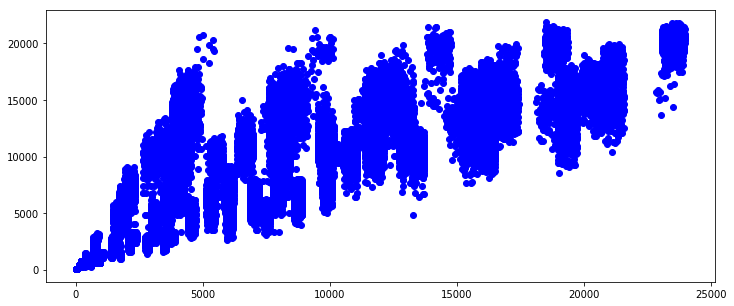

In [226]:
fig, ax = plt.subplots(figsize=(12,5))
ax = plt.scatter(y_test, y_pred_tune, c="blue")

### Test data

In [233]:
test = pd.read_csv(r"C:\Aye backup\Python\Udemy\zero-to-mastery-ml-master\My project_Black_Friday\test.csv")

In [234]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [251]:
test["Product_Category_1"].isna().sum(), test["Product_Category_2"].isna().sum(), test["Product_Category_3"].isna().sum()

(0, 0, 0)

In [248]:
### Lets do same data preprocessing as we do in the train data
test["Product_Category_1"].isna().sum()/550068*100, test["Product_Category_2"].isna().sum()/550068*100, test["Product_Category_3"].isna().sum()/550068*100

(0.0, 13.15182850120349, 29.553073438193096)

In [249]:
test["Product_Category_2"].fillna(test["Product_Category_2"].median(), inplace = True)
test["Product_Category_3"].fillna(test["Product_Category_3"].median(), inplace = True)

In [253]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Category
0,1000004,P00128942,1,46-50,7,1,2,1,1,11.0,14.0,4
1,1000009,P00113442,1,26-35,17,2,0,0,3,5.0,14.0,2
2,1000010,P00288442,0,36-45,1,1,4+,1,5,14.0,14.0,3
3,1000010,P00145342,0,36-45,1,1,4+,1,4,9.0,14.0,3
4,1000011,P00053842,0,26-35,1,2,1,0,4,5.0,12.0,2


In [252]:
Label_Encoder = LabelEncoder()


test["Gender"] = Label_Encoder.fit_transform(test["Gender"])
test["City_Category"] = Label_Encoder.fit_transform(test["City_Category"])
test["Age_Category"] = Label_Encoder.fit_transform(test["Age"])

In [262]:
test["Stay_In_Current_City_Years"].unique()

array([2, 0, 4, 1, 3], dtype=int64)

In [261]:
def stay(Stay_In_Current_City_Years):
        if Stay_In_Current_City_Years == '4+':
            return 4
        else:
            return Stay_In_Current_City_Years
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].apply(stay).astype(int) 

In [264]:
forget = test[["User_ID", "Product_ID", "Age"]]

test.drop(forget, axis =1, inplace = True )

In [265]:
test.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Category
0,1,7,1,2,1,1,11.0,14.0,4
1,1,17,2,0,0,3,5.0,14.0,2
2,0,1,1,4,1,5,14.0,14.0,3
3,0,1,1,4,1,4,9.0,14.0,3
4,0,1,2,1,0,4,5.0,12.0,2


## Make predictions with the model whose hyperparameter are tuned

rf_regressor_tune.predict(test)

    We get the ff error message: 
         "3ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 9 "
    it is because we have Product_category_3 dropped in train data but retained here. so we need to handle this 
    

In [268]:
test.drop("Product_Category_3", axis = 1, inplace = True)

In [279]:
test_pred = rf_regressor_tune.predict(test)
test_pred

array([16226.78466996,  9613.79320019,  7058.52550224, ...,
       12764.76982165, 20033.7068744 ,  2507.59001461])

In [278]:
test.columns

Index(['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Age_Category'],
      dtype='object')

In [ ]:
len(y_pre)

In [280]:
# test = pd.read_csv(r"C:\Aye backup\Python\Udemy\zero-to-mastery-ml-master\My project_Black_Friday\test.csv")

In [286]:
Prediction = pd.DataFrame()
Prediction["User_ID"] = test["User_ID"]
Prediction["Purchase Prediction"] = test_pred

In [288]:
Prediction

,User_ID,Purchase Prediction
0,1000004,16226.784670
1,1000009,9613.793200
2,1000010,7058.525502
3,1000010,2438.634242
4,1000011,2020.289945
...,...,...
233594,1006036,6868.120844
233595,1006036,5866.062715
233596,1006036,12764.769822
233597,1006037,20033.706874


In [294]:
print(rf_regressor_tune.feature_importances_)

[0.00498803 0.02558085 0.00812122 0.01761355 0.00668071 0.90549982
 0.01673857 0.01477725]


In [304]:
test.head(1)

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,7,B,2,1,1,11.0,NaN


In [303]:
# test.drop(["User_ID", "Product_ID", "Age"], axis = 1, inplace=True)

In [327]:
columns = pd.DataFrame({"Features": test.columns, 
                        "Feature Importance" :rf_regressor_tune.feature_importances_})

In [345]:
columns.sort_values("Feature Importance", ascending = False).reset_index(drop=True)

,Features,Feature Importance
0,Product_Category_1,0.905500
1,Occupation,0.025581
2,Stay_In_Current_City_Years,0.017614
3,Product_Category_2,0.016739
4,Product_Category_3,0.014777
5,City_Category,0.008121
6,Marital_Status,0.006681
7,Gender,0.004988


C:\Users\Ayu .LAPTOP-R57J3HIU.000\Anaconda3librarybin\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


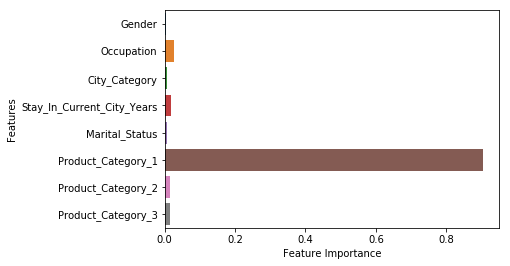

In [357]:
sns.barplot(y="Features", x = "Feature Importance", data = columns)